In [1]:
#Exercise 9.4 of Newman

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

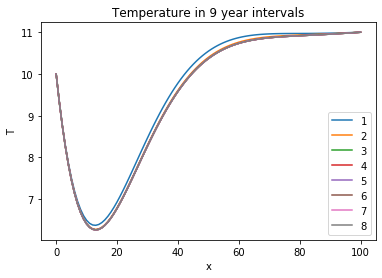

In [15]:
#constants
A = 10 #degree Celcius
B = 12 #degree Celcius
tau = 365 #days
D = 0.1 #m^2 day^-1 (Thermal diffusivity)

def T0(t):
    return A + B*np.sin(2*np.pi*t/tau)

L = 20 # meters
N = 100 # Number of divisions in grid
a = L/N # Grid spacing
h = 0.01 # Time-step

T = np.zeros(N+1,float)
T[1:N]=10 

def iterate(T,t_min,t_max):
    # Main loop
    t = t_min
    c = h*D/a**2

    while t<t_max:

        # Calculate the new values of T
        T[0] = T0(t)
        T[N] = 11
        T[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])

        t += h
    return T


for year in range(8):
    T_year = iterate(T, 0, 365*(year+1))
    t_min = 365*(year+1)
    plt.plot(T_year,label=year+1)

plt.legend()
plt.xlabel("x")
plt.ylabel("T")
plt.title("Temperature in 9 year intervals")
plt.show()

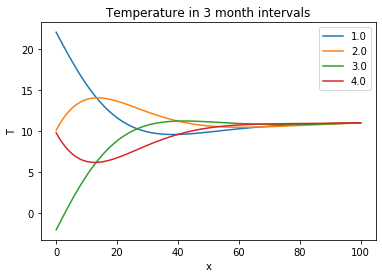

In [13]:
T9 = iterate(T,0,365*9)

T9_i = T9
t_min = 365*9

for t_max in [365*9 + i*(365//4) for i in range(4)]:
    t_max = t_min + 365//4
    T9_i = iterate(T9_i,t_min,t_max)
    plt.plot(T9_i,label=t_max%365/(365//4))
    t_min = t_max

plt.legend()
plt.xlabel("x")
plt.ylabel("T")
plt.title("Temperature in 3 month intervals")
plt.show()